In [1]:
from collections import namedtuple
from operator import itemgetter
from pprint import pformat
import matplotlib.pyplot as plt
 
def kdtree(point_list, depth=0):
    
    try:
        k = len(point_list[0])
    except IndexError:
        return None
 
    axis = depth % k
    
    point_list.sort(key=itemgetter(axis))
    
    median = len(point_list) // 2         
 
    return {
        'location':point_list[median],
        'left_child':kdtree(point_list[:median], depth + 1),
        'right_child':kdtree(point_list[median + 1:], depth + 1)
    }

In [2]:
import math
def distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    
    dx = x1 - x2
    dy = y1 - y2
    
    return math.sqrt(dx*dx + dy*dy)

def find_closest_point(tree, point, depth=0, best=None):
    if tree is None:
        return best
    axis = depth % 2
    
    next_best = None
    next_branch = None
    
    if best is None or distance(point, best) > distance(point, tree['location']):
        next_best = tree['location']
    else:
        next_best = best
        
    if point[axis] < tree['location'][axis]:
        next_branch = tree['left_child']
    else:
        next_branch = tree['right_child']
        
    return find_closest_point(next_branch, point, depth+1, next_best)

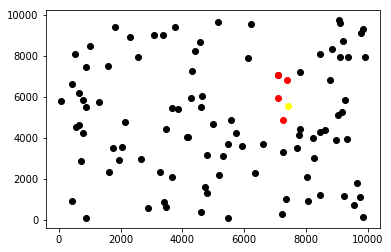

In [3]:
from random import randint
point_list = []
for i in range(100):
    x = randint(1, 10000)
    y = randint(1, 10000)
    point_list.append((x,y))

point_target = (randint(1, 10000),randint(1, 10000))

tree = kdtree(point_list)
best1 = find_closest_point(tree, point_target)
point_list.remove(best1)

tree = kdtree(point_list)
best2 = find_closest_point(tree, point_target)
point_list.remove(best2)

tree = kdtree(point_list)
best3 = find_closest_point(tree, point_target)
point_list.remove(best3)

tree = kdtree(point_list)
best4 = find_closest_point(tree, point_target)


xs = [x[0] for x in point_list]
ys = [x[1] for x in point_list]
plt.scatter(xs, ys, color='black')
plt.scatter(point_target[0], point_target[1], color='yellow')
plt.scatter(best1[0],best1[1],color='red')
plt.scatter(best2[0],best2[1],color='red')
plt.scatter(best3[0],best3[1],color='red')
plt.scatter(best4[0],best4[1],color='red')
plt.show()